# Hoja de Trabajo 4: Regresión Polinomial King Country house prices

El objetivo de esta hoja de trabajo el el siguiente: 

1.Leer el archivo CSV proporcionado (kc_house_data.csv) y almacenarlo en un np.array para ser trabajado en el notebook. 
Ajustar un modelo polinómico (regresión lineal) en base al juego de datos cargado de forma matricial que relacione las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price – sqft_living). 
2.Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase). 
3.Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).  
4.Haga un análisis sobre sus hallazgos. 

## Cargando Librerias a utilizar

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## 1. Cargado Data Set a utilizar

In [ ]:
df = pd.read_csv('kc_house_data.csv')

In [ ]:
df.head(3)

Solo viendo las primeras tres filase de la columna nos damos cuenta que tenemos una variable dummy, como waterfront, algunas que tienen valores de años y si no se cuenta con el dato le colocan 0. Es una buena practica entender nuestras variabes para poder saber como afecta en nuestra regresión.

### 1.1 Separando Nuestra X y Y inicial, Agregando la variable polinomica, con columna de unos

In [ ]:
df['sqft_living2'] = df['sqft_living'] ** 2

In [ ]:
df['cons'] = 1

In [ ]:
y = df[['price']].to_numpy()

In [ ]:
X = df[['cons','sqft_living','sqft_living2']].to_numpy()

In [ ]:
print(y.shape,X.shape)

Para empezar con el ejercicio quedamos con una array de y con 21613 observaciones, y un array de x con la misma cantidad de observaciones con las variables sqft_living, la variable polinomial grado dos de sqft_living y la constante

## 2. Cargando Funciones de Costo

In [ ]:
def linear_cost(X, y, theta): 
    h = X @ theta
    return ((y-h)**2).sum() / (2 * len(X))

In [ ]:
def linear_cost_gradient(X, y, theta): 
    h = X @ theta
    return (X.T @ (h-y))/ len(X)

In [ ]:
def gradient_descent(
X,y,theta_0,linear_cost,linear_cost_gradient,
    learning_rate = 0.0001, threshold=0.001, max_iter=10000): 
    
    theta = theta_0
    iteration = 0 
    costs = []
    thetas = []
    
    while np.linalg.norm(linear_cost_gradient(X,y,theta)) > threshold and iteration < max_iter:
        iteration += 1 
        theta = theta - (learning_rate * linear_cost_gradient(X,y,theta))
        costs.append(linear_cost(X,y,theta))
        thetas.append(theta.copy())
        
    return theta, costs, thetas

## 3. Creando array de thetas iniciales

In [ ]:
m, n = X.shape

In [ ]:
theta_0 = np.random.rand(n,1)

In [ ]:
print(theta_0.shape)

## 4. Shufle para separar nuestros datos para Cross Validation

In [ ]:
np.random.shuffle(X)

In [ ]:
np.random.shuffle(y)

In [ ]:
X_train = X[:12968]
X_cv = X[12968:17290]
X_test = X[17290:21613]

In [ ]:
print(X_train.shape,X_cv.shape,X_test.shape)

In [ ]:
y_train = y[:12968]
y_cv = y[12968:17290]
y_test = y[17290:21613]

In [ ]:
print(y_train.shape,y_cv.shape,y_test.shape)

Verificamos que nuestro shuffle y separación de datos tenga un tamaño que podamos usar para correr nuestras funciones de decensdiente del gradiente y de costos.

## 5. Corriendo regresión polinomio grado 2

In [ ]:
theta, costs, thetas = gradient_descent(X_train,y_train,theta_0,linear_cost,linear_cost_gradient,0.00000000000001,0.001,50)

In [ ]:
len(costs)

In [ ]:
plt.plot(costs)

In [ ]:
print(costs[len(costs)-1])

Como podemos ver nuestra regresión funciona bien, si hace la tarea de minimizar los costos sin embargo, el costo minimizado sigue siendo muy alto, por lo cual seguiremos probando. 

## Regresión polinomio grado 3

In [ ]:
df['sqft_living3'] = df['sqft_living'] ** 3

In [ ]:
y2 = df[['price']].to_numpy()
X2 = df[['cons','sqft_living','sqft_living2','sqft_living3']].to_numpy()

In [ ]:
np.random.shuffle(X2)

In [ ]:
np.random.shuffle(y2)

In [ ]:
X2_train = X2[:12968]
X2_cv = X2[12968:17290]
X2_test = X2[17290:21613]

In [ ]:
y2_train = y2[:12968]
y2_cv = y2[12968:17290]
y2_test = y2[17290:21613]

In [ ]:
m, n = X2.shape
theta_02 = np.random.rand(n,1)

In [ ]:
print(X2_train.shape,X2_cv.shape,X2_test.shape)
print(y2_train.shape,y2_cv.shape,y2_test.shape)

In [ ]:
theta2, costs2, thetas2 = gradient_descent(X2_train,y2_train,theta_02,linear_cost,linear_cost_gradient,0.00000000000000000000001,0.001,10000)

In [ ]:
print(costs2[len(costs)-1])

In [ ]:
print(costs2[len(costs2)-1])

Si agregamos una variable a la 3 podemos ver que si logramos reducir el costo, pero no en su totatalidad ni cercano a 0.

## Corriendo regresión grado 5

In [ ]:
df['sqft_living5'] = df['sqft_living'] ** 5
df['sqft_living4'] = df['sqft_living'] ** 4

In [ ]:
y3 = df[['price']].to_numpy()
X3 = df[['cons','sqft_living','sqft_living2','sqft_living3','sqft_living4','sqft_living5']].to_numpy()

In [ ]:
X3_train = X3[:12968]
X3_cv = X3[12968:17290]
X3_test = X3[17290:21613]

In [ ]:
y3_train = y3[:12968]
y3_cv = y3[12968:17290]
y3_test = y3[17290:21613]

In [ ]:
m, n = X3.shape
theta_03 = np.random.rand(n,1)

In [ ]:
print(X3_train.shape,X3_cv.shape,X3_test.shape)
print(y3_train.shape,y3_cv.shape,y3_test.shape)

In [241]:
theta3, costs3, thetas3 = gradient_descent(X3_train,y3_train,theta_03,linear_cost,linear_cost_gradient,0.000000000000000000000000000000000000001,0.01,1000)

In [242]:
print(costs3[len(costs3)-1])

3.8487829936685975e+33


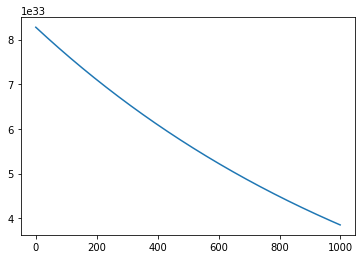

In [244]:
plt.plot(costs3)

Con un polinomio grado 5 logramos disminuir un poco el costo, pero no de una manera casi aceptable teniendo un costo de solo 3.84 Si seguimos aumentando el grado del polinomio este tendra un error mucho mas cercano a 0 o Podra disparase el error nuevamente. por esto nos quedamos con este modelos

## Cross validation con Polinomio grado 5

Despues de probar 3 diferentes decídi no hacer un cambio polinomial para ver si no es mejor regresión

In [245]:
print(theta3.shape)

(6, 1)


In [247]:
print(X3_cv.shape,y3_cv.shape)

(4322, 6) (4322, 1)


In [249]:
costo_cv = linear_cost(X3_cv, y3_cv, theta3)

In [250]:
costo_cv

3.891050600800533e+33

Como vemos el costo es muy similar a cuando entrenamos con nuestros datos de entrenamiento. por lo tanto este modelo tiene esperanza de trabajar bien con datos que nunca ha visto. pero ahora probaremos hacer este procedimiento con el train set.

## Prueba con test data polinomio grado 5

In [251]:
print(theta3.shape)

(6, 1)


In [252]:
print(X3_test.shape,y3_test.shape)

(4323, 6) (4323, 1)


In [255]:
costo_test = linear_cost(X3_test, y3_test, theta3)

In [256]:
costo_test

4.877908530297251e+33

Como vemos nuestro costo aumenta pero es un valor muy pequeño por lo cual podriamos decir que nuestro modelo tiene una buena capacidad de generalización, por lo que un polinomio con grado 5 logra predecir de buena manera el precio de las casas dependiendo de unicamente los metros cuadrados del lugar. 